# Analysis - exp13 and 14

Repeats of stumbler (13) and stumbler-strategist (14) exps, with optimal parameters.

In [10]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

# Find the files
## Exp 13

In [11]:
path = "/Users/type/Code/azad/data/wythoff/exp13/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

## Exp 14

In [12]:
path = "/Users/type/Code/azad/data/wythoff/exp14/"

exp_14 = []
runs = range(2, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [13]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [14]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_13]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14]))

0.8391719961466536
0.8681931490174158


# Plots

## Optimal play

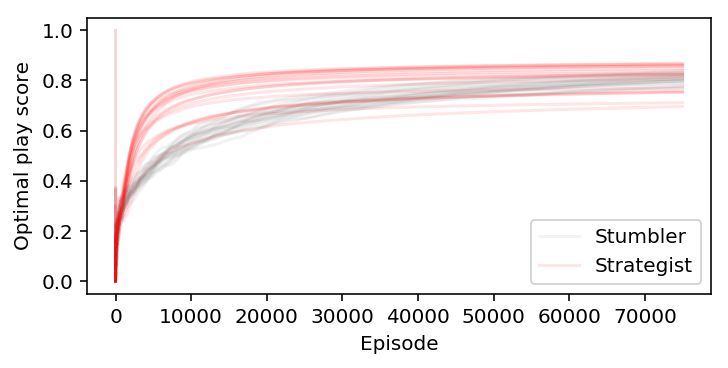

In [15]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [17]:
episode_13, exp_13_avg_score = score_summary(exp_13)
episode_14, exp_14_avg_score = score_summary(exp_14)

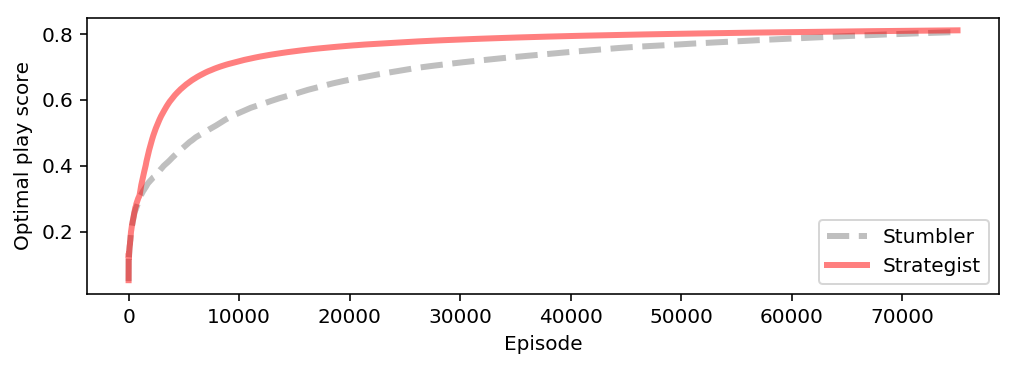

In [19]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg_score, linestyle="--", color='grey', alpha=.5, linewidth=3, label="Stumbler")
_ = plt.plot(episode_14, exp_14_avg_score, color='red', alpha=.5, linewidth=3, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

## Total reward

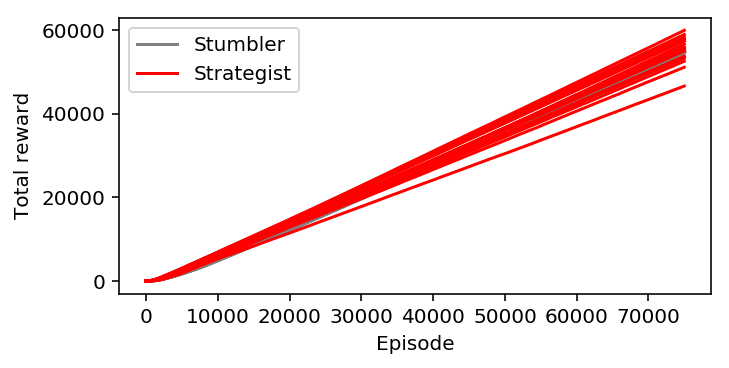

In [7]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=1, label=lab
    )

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")